## Import Necessary Libraries

In [173]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Task #1: Merging 12 months of sales data into a single file

In [174]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

## Task #2: Read in updated dataframe

In [175]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task #3: Cleaning Data

### Find NaN locations and drop it down

In [176]:
nan_df = all_data[all_data.isna().any(axis=1)] # Figure out still have some NaN rows
nan_df.head()

all_data = all_data.dropna(how='all')  # Drop down all NaN rows
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [177]:
# Locate all rows start with 'Or' in Order Date column
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] 
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [178]:
# Now we see the problem why we get the issue: invalid literal for int() with base 10: 'Or'

# We filter all rows that doesn't start with 'Or' in Order Date
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Convert columns into the correct type

In [180]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  # Covert to numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# Convert to numeric

## Task#4: Argument data with additional columns

### Add the Month Column

In [181]:
all_data['Month'] = all_data['Order Date'].str[0:2] # 
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sale column

In [182]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a City column


In [183]:
# Use .apply() function
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][1:3]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))  
all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))  

all_data['State and City'] = all_data['City'] + " (" + all_data['State'] +")"
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,State and City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)


## Question 1: What was the best month for sales? How much was earned that month?

In [185]:
sum_by_month_stats = all_data.groupby('Month').sum() # Grouping all data in the same month together
sum_by_month_stats

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,State,State and City
Month,,,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas New York City New York City San Franci...,TXNYNYCANYCANYCANYNYTXMAORORCACATXMANYCACACACA...,Dallas (TX) New York City (NY) New York City ...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland San Francisco New York City Atlanta ...,MECANYGAWATXCAWACACACACACANYGACACACATXTXCAMACA...,Portland (ME) San Francisco (CA) New York Cit...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco Portland San Francisco San Fran...,CAORCACACACACAMANYCANYORTXCAGAMACATXTXTXCACACA...,San Francisco (CA) Portland (OR) San Francisc...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas Boston Los Angeles Los Angeles Los Ang...,TXMACACACACAWAGACAMACAWATXTXGANYCACACANYCATXMA...,Dallas (TX) Boston (MA) Los Angeles (CA) Los ...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland San Francisco Boston Boston San Fran...,ORCAMAMACACACANYCACACACACATXCACAMACACACATXMAMA...,Portland (OR) San Francisco (CA) Boston (MA) ...
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26,Portland San Francisco Los Angeles Seattle Sa...,MECACAWACAWACANYORCANYMACAMAMATXTXWAWACAGAMATX...,Portland (ME) San Francisco (CA) Los Angeles ...
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta Seattle Atlanta Atlanta Seattle San F...,GAWAGAGAWACANYNYCATXCACATXCACACACACACAMACAMACA...,Atlanta (GA) Seattle (WA) Atlanta (GA) Atlant...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle Dallas Portland Los Angeles New York ...,WATXORCANYCACACACACACAMAORTXNYGATXNYCACACAMACA...,Seattle (WA) Dallas (TX) Portland (OR) Los An...
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco San Francisco Seattle San Franc...,CACAWACAMACACACACAMACAORCATXCAWAGACAMECANYCACA...,San Francisco (CA) San Francisco (CA) Seattle...


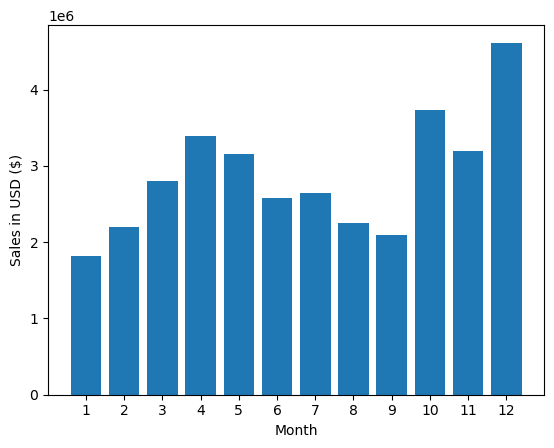

In [186]:
# Plot the bar chart to visualize the sum_stats

months = range(1,13)
plt.bar(months, sum_by_month_stats['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

## Answer 1: The best month for sales is December and that month made $4,613,443.34.

## Question 2: What city had the highest number of sales?

In [197]:
sum_by_city_stats = all_data.groupby('State and City').sum() # Grouping all data in the same city together
sum_by_city_stats
max(sum_by_city_stats['Sales'])

TypeError: datetime64 type does not support sum operations

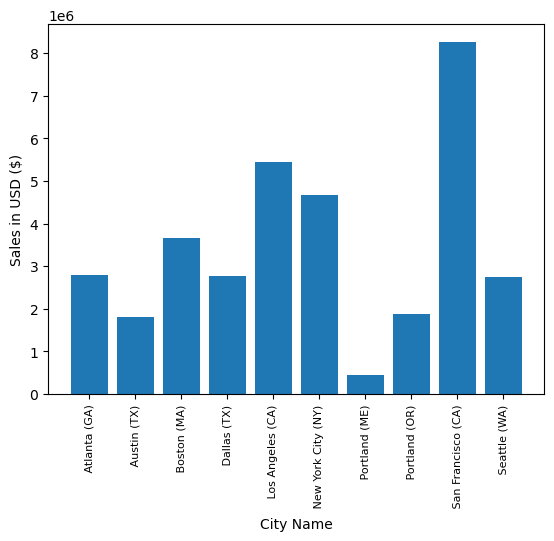

In [188]:
# Group distinct cities
cities = [city for city, df in all_data.groupby('State and City')] 


plt.bar(cities , sum_by_city_stats['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

## Answer 2: San Francisco has the highest numbers of sales.
## This city made $8,262,203.91.

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [189]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])  # Convert Order Date to datetime
all_data.head()

C:\Users\thien\AppData\Local\Temp\ipykernel_8524\2351218807.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])  # Convert Order Date to datetime


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,State and City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)


### Add hour and minute columns

In [190]:
all_data['Hour'] = all_data['Order Date'].dt.hour  # Get the hour of the Order Date
all_data['Minute'] = all_data['Order Date'].dt.minute  # Get the minute of the Order Date

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,State and City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA),9,27


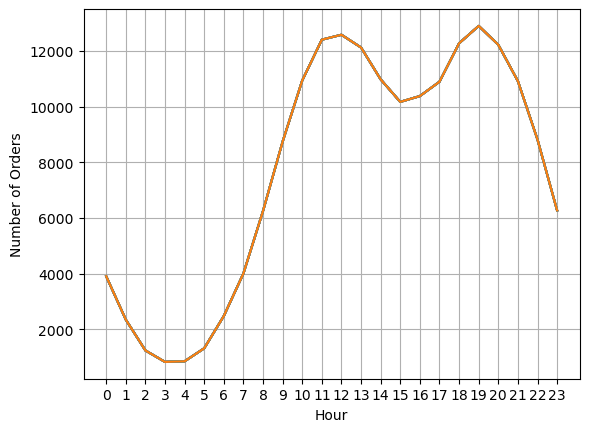

In [191]:
hours = [hour for hour, df in all_data.groupby('Hour')] 

plt.plot(hours, all_data.groupby(['Hour']).count()) # Count the numbers of distinct hour the purchases are made
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


## Answer 3: 11AM-12PM and 7PM are the time customers made purchases the most. 

## Question 4: What products are most oftern sold together?

In [198]:
# Create a new data frame 
df = all_data[all_data['Order ID'].duplicated(keep=False)] # False because we keep everything

# Create a data frame that the items sold together are on the same line
df ['Grouped Orders'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop down the duplicated rows, same order rows
df = df[['Order ID', 'Grouped Orders']].drop_duplicates()

df.head()


C:\Users\thien\AppData\Local\Temp\ipykernel_8524\1477100867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Grouped Orders'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Orders
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [193]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped Orders']:
    splited_order_list = row.split(',')
    count.update(Counter(combinations(splited_order_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Answer 4: 'iPhone', 'Lightning Charging Cable' are the most items sold together

## Question 5: What product sold the most? Why do you think it sold the most?

In [212]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.count()['Quantity Ordered']
quantity_ordered



Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64

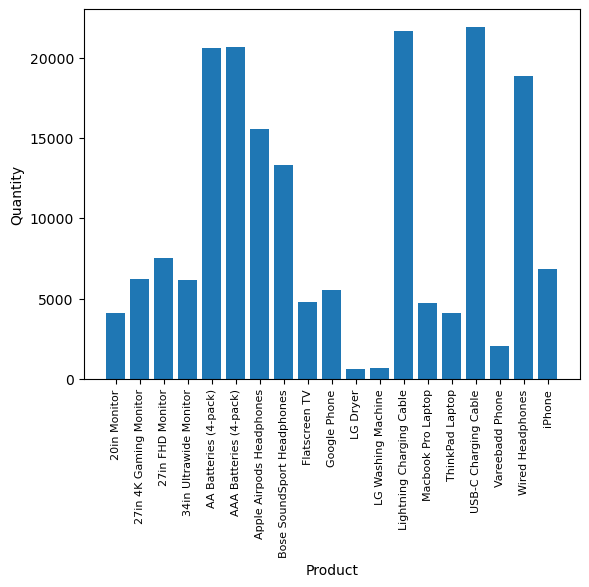

In [206]:
products = [product for product, df in product_group] 

plt.bar(products , quantity_ordered)
plt.xticks(products, rotation = 'vertical', size=8)
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.show()

## Answer 5: UBS-C Charging Cable is the most sold item.